In [69]:
import pandas as pd
import numpy as np

## Read the pollution file and show some examples 

In [71]:
df = pd.read_csv('../data/pollution_us_2000_2016.csv')
df 

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.300,0,26.0
6,6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,0.850000,1.600,23,NaN
7,7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,1.066667,2.300,0,26.0
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.929167,4.400,8,NaN
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.500,8,28.0


### List of columns and States 


In [73]:
print list(df)
states = list(df['State'].unique())
print 'There are %d states:'%len(states) 
print states 

['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address', 'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units', 'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
There are 47 states:
['Arizona', 'California', 'Colorado', 'District Of Columbia', 'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia', 'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee', 'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland', 'Wisconsin', 'Country Of Mexico', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota', 'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota', 'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alaba

In [12]:
# names = ['State', 'Date Local', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
# mydf = pd.read_csv('../data/pollution_us_2000_2016.csv', usecols= names)

### Get mean of each gas in all states over years (2000 - 2016)

In [79]:
years = range(2000, 2017)

POLUTION = dict() 
for state in states:
    print 'Processing...' + state + '...'
    POLUTION[state] = dict()
    for gas in ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']:
        POLUTION[state][gas] = [0]*len(years);
        
    for i, year in enumerate(years): 
        start_date = str(year)+ '-01-01'
        end_date = str(year)+ '-12-31'
        tmp  = df.loc[(df['State'] == state) & (start_date <= df['Date Local']) & (df['Date Local']<= end_date)]
        for gas in ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']:
            POLUTION[state][gas][i] = tmp[gas].mean()
        

Arizona
California
Colorado
District Of Columbia
Florida
Illinois
Indiana
Kansas
Kentucky
Louisiana
Michigan
Missouri
New Jersey
New York
North Carolina
Oklahoma
Pennsylvania
Texas
Virginia
Massachusetts
Nevada
New Hampshire
Tennessee
South Carolina
Connecticut
Iowa
Maine
Maryland
Wisconsin
Country Of Mexico
Arkansas
Oregon
Wyoming
North Dakota
Idaho
Ohio
Georgia
Delaware
Hawaii
Minnesota
New Mexico
Rhode Island
South Dakota
Utah
Alabama
Washington
Alaska


In [84]:
POLUTION['Pennsylvania']['CO Mean']

[0.302549696049574,
 0.32083088938392995,
 0.2606318961486588,
 0.2661144247720365,
 0.3263051896499698,
 0.21349479060579457,
 0.23131111962642498,
 0.2380835786962366,
 0.18491549100039129,
 0.23536362468689118,
 0.26829531569839304,
 0.23196090294171057,
 0.22253922416263658,
 0.16630085788561527,
 0.18998169201995013,
 0.17328952542108547,
 0.09498146691729323]

## Read Infant mortality cvs 

In [86]:
infant_df = pd.read_csv('../data/Infant Mortality Rate by State.csv')
infant_df 

,Region/State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,National,6.9,6.8,7.0,6.8,6.8,6.9,6.7,6.8,6.6,6.4,6.1,6.1,6.0,6.0,5.8
1,Alabama,9.5,9.3,9.1,8.6,8.7,9.5,9.0,9.9,9.5,8.3,8.7,8.2,8.9,8.6,8.7
2,Alaska,6.9,7.9,5.6,6.8,6.6,5.9,7.0,6.6,6.0,6.9,3.6,3.8,5.1,5.8,6.7
3,Arizona,6.8,7.0,6.4,6.5,6.7,6.8,6.4,6.9,6.4,6.0,5.9,6.0,5.8,5.2,6.1
4,Arkansas,8.2,8.4,8.4,8.6,8.4,7.8,8.4,7.8,7.4,7.6,7.2,7.3,7.1,7.8,7.5
5,California,5.4,5.4,5.4,5.2,5.2,5.3,5.0,5.2,5.1,4.9,4.7,4.8,4.4,4.8,4.3
6,Colorado,6.1,5.8,6.0,6.1,6.2,6.4,5.8,6.1,6.2,6.2,5.9,5.5,4.6,5.1,4.8
7,Connecticut,6.5,6.0,6.5,5.3,5.4,5.8,6.2,6.7,5.9,5.6,5.3,5.2,5.2,4.8,4.8
8,Delaware,9.6,10.6,8.6,9.4,8.6,9.0,8.1,7.6,8.4,8.0,7.5,8.9,7.6,6.4,6.7
9,District of Columbia,12.1,10.9,11.3,10.6,12.2,13.7,11.8,13.0,11.2,10.4,7.6,7.4,7.9,6.7,7.5


In [88]:
d_states = list(infant_df['Region/State'].unique())
print 'There are %d states:'%len(d_states) 
print d_states 

There are 52 states:
['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [104]:
DISEASE = dict() 
for index, row in infant_df.iterrows():
    DISEASE[row['Region/State']] = dict() 
    DISEASE[row['Region/State']]['Infant Mortality'] = np.array([row[str(i)] for i in range(2000, 2015)])

### Show relationship btw polution and infant mortality 

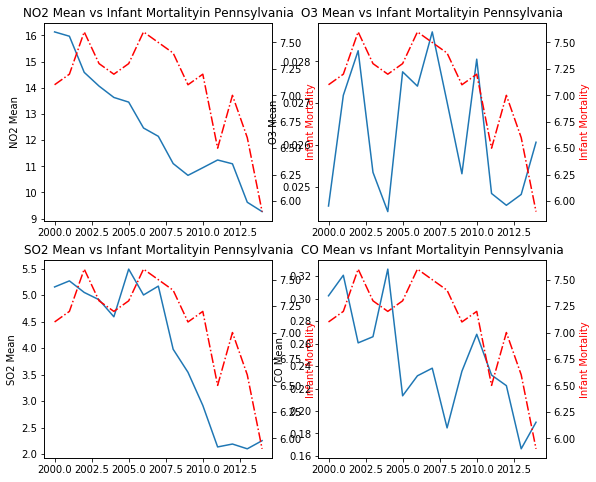

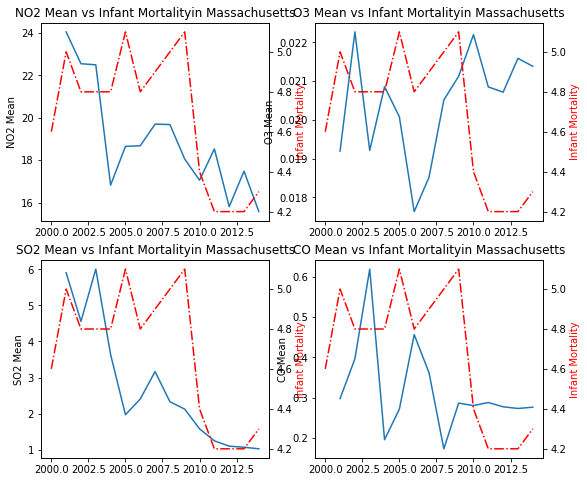

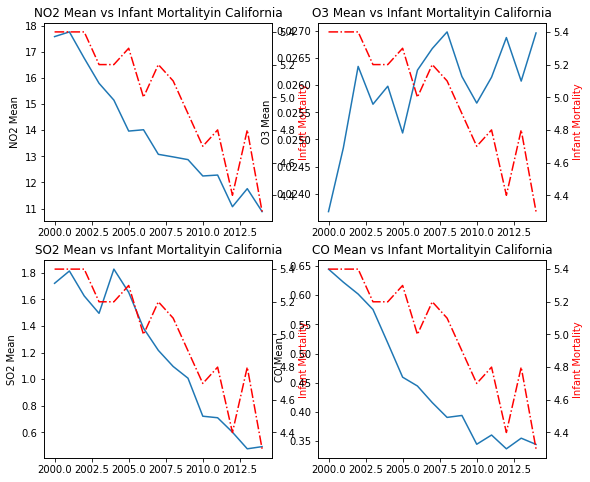

In [163]:

import matplotlib.pyplot as plt
gas_names = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']

states2 = ['Pennsylvania', 'Massachusetts', 'California']

x = range(2000, 2015)
disease_names = ['Infant Mortality']

for state in states2:
    fig = plt.figure(figsize=(9,8))
    for gas_id, gas_name in enumerate(gas_names): 
        y1 = POLUTION[state][gas_name][:15]
        y2 = DISEASE[state][disease_names[0]]

        ax1 = fig.add_subplot(221 + gas_id)
        ax1.plot(x, y1)
        ax1.set_ylabel(gas_name)

        ax2 = ax1.twinx()
        ax2.plot(x, y2, 'r-.')
        ax2.set_ylabel(disease_names[0], color='r')
        ax1.set_title(gas_name + ' vs ' + disease_names[0] + 'in ' + state)
#     plt.title(state)
    plt.show() 

What do you see? Infant mortality rate 'depends on' SO2, NO2, and C), doesn't depend on O3. 

### Heart disease

In [158]:
heart_df = pd.read_csv('../data/Heart Disease Death Rate by State.csv')
heart_df 

,Region/State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,National,257.6,247.2,241.1,232.3,217.0,211.1,200.2,190.9,186.5,180.1,179.1,173.7,170.5,169.8,167.0,168.5
1,Alabama,299.5,289.5,286.3,281.7,276.3,273.5,253.3,235.5,233.1,231.5,236.0,228.7,225.1,228.4,224.0,229.7
2,Alaska,211.7,187.3,167.0,181.8,158.3,162.6,167.2,147.9,145.4,156.9,151.5,149.6,136.5,135.0,146.6,154.1
3,Arizona,214.0,205.2,204.3,198.3,185.7,185.0,164.2,152.5,145.6,144.6,146.7,150.3,145.5,141.1,136.4,138.8
4,Arkansas,283.8,279.7,279.5,258.4,250.9,249.6,233.0,221.8,226.2,218.8,222.5,213.8,218.6,214.1,217.5,223.2
5,California,240.0,230.7,225.9,219.8,202.1,196.3,192.5,177.9,170.2,165.5,161.9,159.0,153.3,151.8,142.2,145.6
6,Colorado,185.3,181.8,180.3,178.0,162.7,162.0,151.6,145.3,141.0,136.5,132.8,129.8,127.3,125.7,130.3,128.4
7,Connecticut,232.7,216.4,216.9,201.8,182.5,172.9,177.3,171.0,170.9,164.8,155.7,155.1,155.3,148.9,145.6,147.8
8,Delaware,262.5,258.9,236.7,243.1,232.3,224.3,201.2,200.2,179.4,177.8,175.7,175.2,168.8,168.0,168.7,165.2
9,District of Columbia,310.6,310.3,293.6,287.3,274.9,268.2,260.0,239.4,229.2,219.1,222.4,194.4,213.0,213.5,207.8,187.6


In [159]:
for index, row in heart_df.iterrows():
    DISEASE[row['Region/State']]['Heart'] = np.array([row[str(i)] for i in range(2000, 2015)])

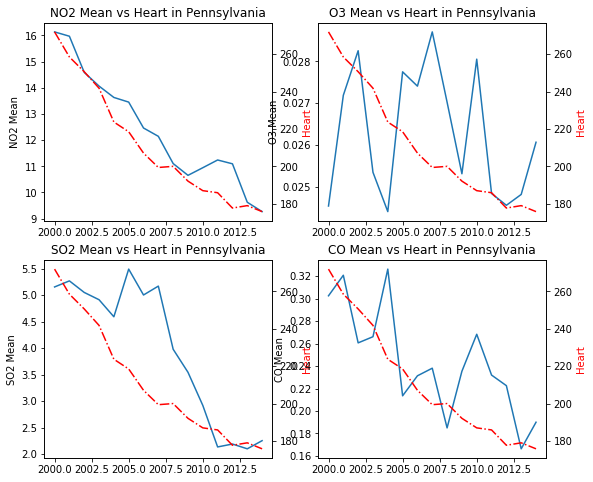

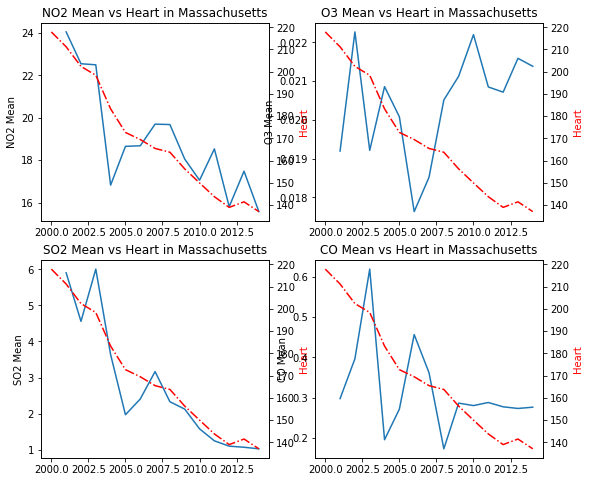

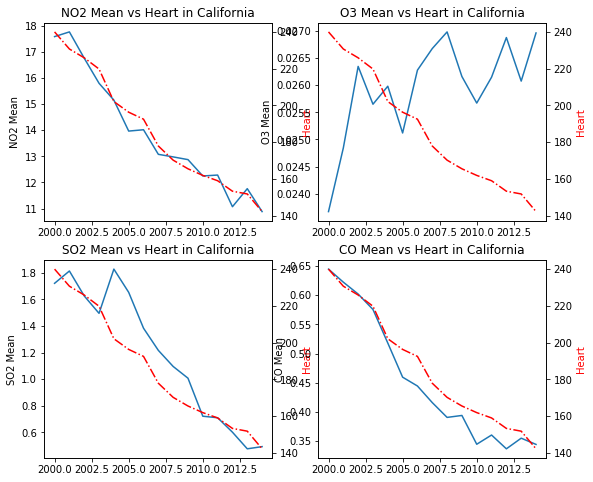

In [165]:

x = range(2000, 2015)
disease_names = ['Heart']

for state in states2:
    fig = plt.figure(figsize=(9,8))
    for gas_id, gas_name in enumerate(gas_names): 
        y1 = POLUTION[state][gas_name][:15]
        y2 = DISEASE[state][disease_names[0]]

        ax1 = fig.add_subplot(221 + gas_id)
        ax1.plot(x, y1)
        ax1.set_ylabel(gas_name)

        ax2 = ax1.twinx()
        ax2.plot(x, y2, 'r-.')
        ax2.set_ylabel(disease_names[0], color='r')
        ax1.set_title(gas_name + ' vs ' + disease_names[0] + ' in ' + state)
#     plt.title(state)
    plt.show() 